In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 

def FNC_GaussianAntennaPattern(lamda,HPBW,azimuth_angle,azimuth_reference_angle):
    apertureEfficiency = 0.9
    elevationAngle = 90*(pi/180)
    elevationReferenceAngle = 90*(pi/180)
    dishDiameter = lamda/(HPBW*math.sqrt(apertureEfficiency))
    if azimuth_reference_angle == 0 and azimuth_angle > (180*np.pi/180):
        azimuth_angle = (360*np.pi/180-azimuth_angle)
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
    elif azimuth_reference_angle == (45*np.pi/180) and azimuth_angle > (225*np.pi/180):
        azimuth_angle = (360*np.pi/180-azimuth_angle)+90*np.pi/180
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
        
    elif azimuth_reference_angle == (90*np.pi/180) and azimuth_angle > (270*np.pi/180):
        azimuth_angle = (360*np.pi/180-azimuth_angle)+180*np.pi/180
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
    
    elif azimuth_reference_angle == (135*np.pi/180) and azimuth_angle > (315*np.pi/180):
        azimuth_angle = (360*np.pi/180-azimuth_angle)+270*np.pi/180
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
        
        ## 180 derecede zaten tam bir gauss yaşandığından onu kalibre etmeme gerek yok.
    
    elif azimuth_reference_angle == (225*np.pi/180) and azimuth_angle < ((azimuth_reference_angle-180*np.pi/180)):
        azimuth_angle = (90*np.pi/180-azimuth_angle)
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
        
    elif azimuth_reference_angle == (270*np.pi/180) and azimuth_angle < ((azimuth_reference_angle-180*np.pi/180)):
        azimuth_angle = (180*np.pi/180-azimuth_angle)
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
    
    elif azimuth_reference_angle == (315*np.pi/180) and azimuth_angle < ((azimuth_reference_angle-180*np.pi/180)):
        azimuth_angle = (270*np.pi/180-azimuth_angle)
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
    
    else:
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
        
    return antennaGain 

def create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,target_noise_db):
    #M: Anten sayısı  D:Kaynak sayısı, lamda: Dalga boyu, delta: Antenler arası mesafe, tetha: Sinyal geliş açı matrisi
    #signal: Kaynaktan gelen sinyal, N: Örnek sayısı.
    pi = np.pi
    radyan = pi/180
    target_noise_watts = 10 ** (target_noise_db / 10)
    mean_noise = 0
    noise = np.random.normal(mean_noise, np.sqrt(target_noise_watts), len(t))
    r = lamda/(4*np.sin(np.pi/M))
    
    a_phi = np.array([[0]*D]*M,dtype=np.complex_)
    
   # phi_new = np.array([phi[item]/0.1 for item in range(D)],dtype=np.int_)#dtype int yapmazsak float oluyor. Bu da indeksler için sıkıntı yaratıyor.
    #print(f'phi_new {phi_new}')
    #Alttaki döngü array manifoldu oluşturuyor.
    for item in range(D):#sinyal sayısı
        for n in range(M):#anten sayısı
            #a_phi[n][item] = np.exp(1j*beta*r*np.cos(phi-2*n*pi/M))
            #indx = np.where(phi == phi
            
            a_phi[n][item] = antennaGains[n][int(phi[item]/(360/len(antennaGains[0])))]*np.exp(1j*2*pi*(r/lamda)*np.cos(np.deg2rad(phi[item])-((n/M)*2*pi))) #exp in içine bak
            
    print(a_phi)
    print(f'a_phi dimensions: {a_phi.shape}')
    x_k = (a_phi @ signal)  #X(k) nın gürültüsüz halinin oluşturulması.
    print(x_k)
    print(x_k.shape)
    received_signal = x_k + noise
    print(received_signal.shape)
    
    return received_signal,x_k

def music_UCA(received_signal,angle,M,D,lamda,delta,antennaGains):
    pi = np.pi
    radyan = np.pi/180
    r = lamda/(4*np.sin(np.pi/M))
    Cov_rec_sig = np.cov(received_signal)
    #print(f"Kovaryans matris\n{Cov_rec_sig}") #Kovaryans matrisi bulduk.
    eigenvalues, eigenvectors = np.linalg.eig(Cov_rec_sig)
    #print(f'\n\nEigenvalues:\n{eigenvalues}\n\nEigenvector:\n{eigenvectors}')
    eigenvalues_yedek = eigenvalues
    signal_subspace = D
    noise_subspace = M-D
    Vn = np.array([[0]*(M-D)]*(M),dtype=np.complex_)
    eigenvectorss = np.array(eigenvectors).T #eigenvectorsün transpozunu almamın sebebi sütunları çekmektense onları satır olarak çekmenin daha kolay olması.
    for item in range(M-D):
        Min_Eigenv = min(eigenvalues_yedek)
        out = np.where(Min_Eigenv == eigenvalues)#bulduğumuz min eigenvalue nin dizi içindeki indeksini buluyoruz.
        out1 = np.where(Min_Eigenv == eigenvalues_yedek) 
        #Yukarıda eigenvalue_yedek değişkeni kullandık çünkü oradan minimum değeri çekip o dizide siliyoruz. Ana dizide de bunun indeksini buluyoruz.
        indeks = out[0][0]# indeks array şeklinde verildi. Saf indeks değerini çekiyoruz. Bu indeks değeriyle eigenvectoru bulacağız.
        indeks1 = out1[0][0]# yedek veriden değeri silmek için diğer indeksi çekiyoruz
        print(f'\n\nMinimum Eigenvalue:\n{Min_Eigenv}')
        Vn[:,item] = eigenvectorss[indeks]
        eigenvalues_yedek = np.delete(eigenvalues_yedek,indeks1)
    
    #print(f'\n\nVn:\n{Vn}')
 
    Vn_H = np.conjugate(Vn.T)
    #print(f'\n\nHermitian Vn:\n{Vn_H}')
    
    a_phi = np.array([[0]*len(angle)]*M,dtype=np.complex_)
    
    #Alttaki döngü array manifoldu oluşturuyor.
    for item in range(len(angle)):#sinyal sayısı
        for n in range(M):#anten sayısı
            #a_phi[n][item] = np.exp(1j*beta*r*np.cos(phi-2*n*pi/M))
            a_phi[n][item] = (antennaGains[n][item])*np.exp(1j*2*pi*(r/lamda)*np.cos(np.deg2rad(angle[item])-((n/M)*2*np.pi))) #exp in içine bak
    a_phi_H = np.conjugate(a_phi.T)
    #print(f'a_phi: {a_phi}')
    #print(f'dimension of a_phi: {a_phi.shape}')
    #print(f'dimension of a a_phi_H: {a_phi_H.shape}')
    
    Pmusic = np.array([0 for i in range(len(angle))],dtype=np.complex_)
    for item in range(len(angle)):
        if item !=len(angle):
            final = np.matmul(a_phi_H[item:item+1],Vn @ Vn_H @ a_phi[:,item])
        else:
            final = np.matmul(a_phi_H[item:],Vn @ Vn_H @ a_phi[:,item])
        
        Pmusic[item]=(1/(final))
    for item in range(len(angle)):
        Pmusic[item] = 20*math.log(abs(Pmusic[item]))
    return Pmusic

[[-7.65529842e-12+2.31660683e-10j -1.30745999e-47-7.19624977e-48j]
 [-1.83146393e+02-1.43379865e+02j -6.47637982e-89+9.00832250e-89j]
 [-1.37091790e+02-1.01389126e+02j -1.21054970e-55+3.36684798e-58j]
 [ 3.02681652e-12+9.12652194e-11j  5.54577054e-24-2.07319223e-24j]
 [-1.17991245e-36-3.57059006e-35j -1.85322492e-04+1.02001357e-04j]
 [-8.03986661e-72+6.29417247e-72j -3.22306616e+03-4.48312486e+03j]
 [-7.21521726e-71+5.33616619e-71j -1.05282764e-01-2.92818263e-04j]
 [ 5.59321159e-36-1.68647713e-34j  1.37372361e-18+5.13543264e-19j]]
a_phi dimensions: (8, 2)
[[-1.53105968e-10+4.63321366e-09j -1.45597543e-10+4.40599758e-09j
  -1.23808705e-10+3.74663501e-09j ... -1.23808705e-10+3.74663501e-09j
  -1.45597543e-10+4.40599758e-09j -1.53105968e-10+4.63321366e-09j]
 [-3.66292787e+03-2.86759729e+03j -3.48329529e+03-2.72696829e+03j
  -2.96201618e+03-2.31887437e+03j ... -2.96201618e+03-2.31887437e+03j
  -3.48329529e+03-2.72696829e+03j -3.66292787e+03-2.86759729e+03j]
 [-2.74183580e+03-2.02778253e+03

<IPython.core.display.Javascript object>


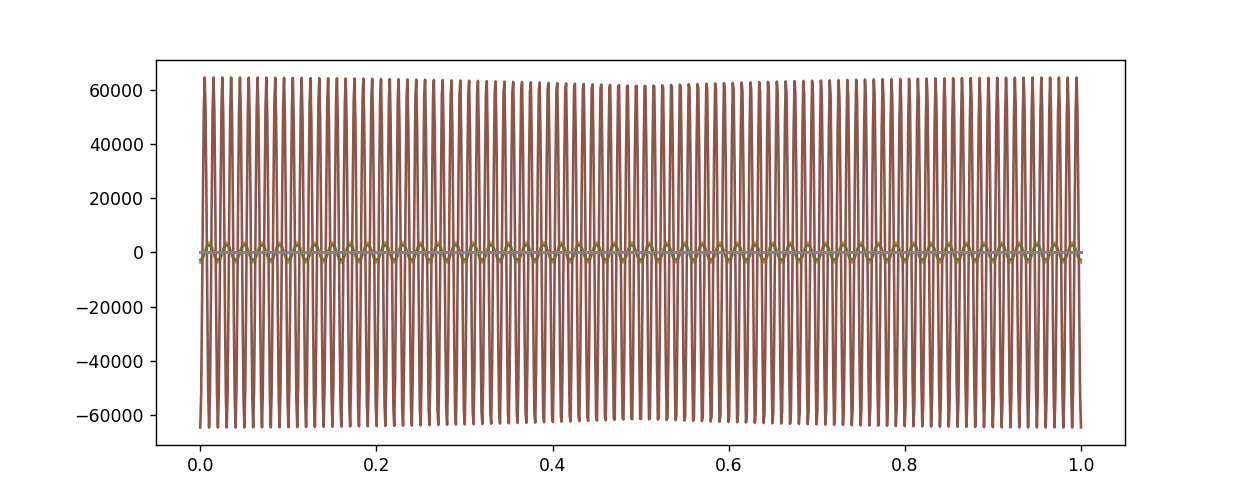

<IPython.core.display.Javascript object>


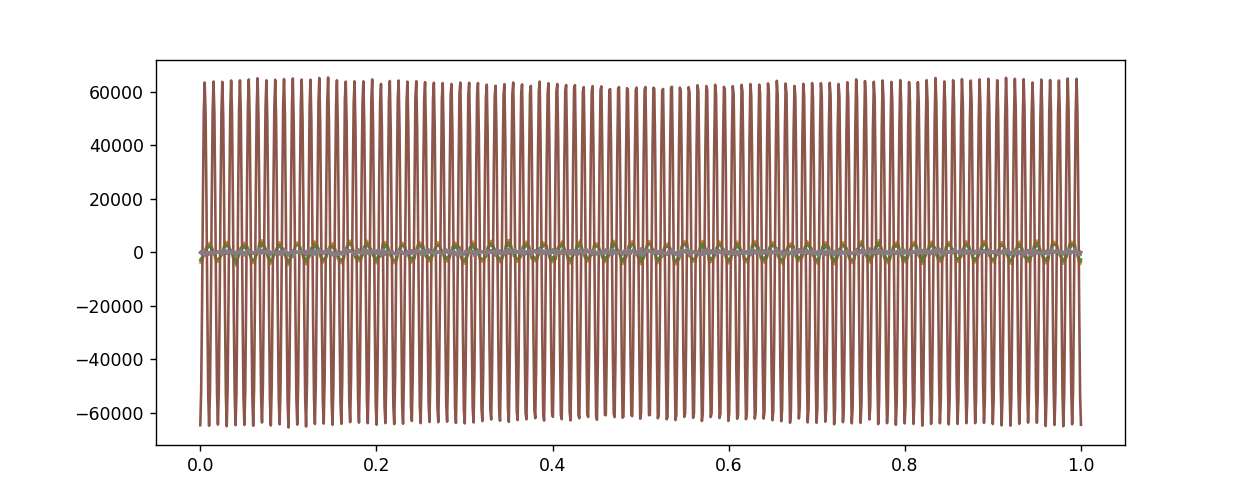



Minimum Eigenvalue:
(-1.5429722309131855e-07+1.8078381286509332e-08j)


Minimum Eigenvalue:
(-2.91225985771357e-08+2.233192360036833e-08j)


Minimum Eigenvalue:
(-1.846619264939521e-08+6.402713473990471e-10j)


Minimum Eigenvalue:
(-1.4676749940943054e-08-3.2820827783569944e-08j)


Minimum Eigenvalue:
(6.149413669985143e-09+2.5595010788368694e-09j)


Minimum Eigenvalue:
(1226099.0553756147+2.5933539074155893e-08j)


In [11]:
import DoA

M = 8
D = 2
f = 50 #750 MHz
c = 3*10**8
lamda = c/f
delta = lamda/2
t = np.linspace(0,1,1000)
phi = np.array([67,230])
signal = np.array([20*np.cos(2*np.pi*f*t),20*np.cos(2*np.pi*100*t)])
noise_db = 54
#noise_db = 23

pi = np.pi
radyan = np.pi/180
azimuthAngles = np.arange(0,360,1)*radyan
antennaGains = np.array([[0 for item in range(len(azimuthAngles))] for element in range(M)],dtype=np.float_) #4x360. 
halfPowerBeamwidth = 20*(pi/180)
azimuthReferenceAngle = np.array([(item*2*np.pi/M) for item in range(M)])
#print(azimuthReferenceAngle/radyan)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)

plt.figure(figsize=(10,4))
for item in x_k:
    plt.plot(t,item)    
    
plt.figure(figsize=(10,4))
for item in rec_sig:
    plt.plot(t,item)
    

#angles = np.arange(0,360,0.1)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)

## Yukarıdaki spektrumda gördüğümüz şey anten kazancıdır. Azimuth reference angle ile referans aldığımız açıyı giriyoruz. Half power beamwidth ise kazancın yarıya kadar düştüğü açıdır. Yani anten kazancımız normal kazanç olarak 6000 ise 3000 e kadar düştüğü açı aralığı 20 derece ise Halfpowerbeamwidth 20 dir. Desibel olarak bakıyor isek bu -3dB aşağı indiği seviyedir. Azimuth angle değerlerini 360 derece boyunca verince spektrum anten kazancının hangi açılarda nasıl olduğunu göstermektedir. Burada 35 ila 55 derece arasında anten kazancı iyidir.

[[-7.65529842e-12+2.31660683e-10j -1.30745999e-47-7.19624977e-48j]
 [-1.83146393e+02-1.43379865e+02j -6.47637982e-89+9.00832250e-89j]
 [-1.37091790e+02-1.01389126e+02j -1.21054970e-55+3.36684798e-58j]
 [ 3.02681652e-12+9.12652194e-11j  5.54577054e-24-2.07319223e-24j]
 [-1.17991245e-36-3.57059006e-35j -1.85322492e-04+1.02001357e-04j]
 [-8.03986661e-72+6.29417247e-72j -3.22306616e+03-4.48312486e+03j]
 [-7.21521726e-71+5.33616619e-71j -1.05282764e-01-2.92818263e-04j]
 [ 5.59321159e-36-1.68647713e-34j  1.37372361e-18+5.13543264e-19j]]
a_phi dimensions: (8, 2)
[[-1.53105968e-10+4.63321366e-09j -1.45597543e-10+4.40599758e-09j
  -1.23808705e-10+3.74663501e-09j ... -1.23808705e-10+3.74663501e-09j
  -1.45597543e-10+4.40599758e-09j -1.53105968e-10+4.63321366e-09j]
 [-3.66292787e+03-2.86759729e+03j -3.48329529e+03-2.72696829e+03j
  -2.96201618e+03-2.31887437e+03j ... -2.96201618e+03-2.31887437e+03j
  -3.48329529e+03-2.72696829e+03j -3.66292787e+03-2.86759729e+03j]
 [-2.74183580e+03-2.02778253e+03

<IPython.core.display.Javascript object>


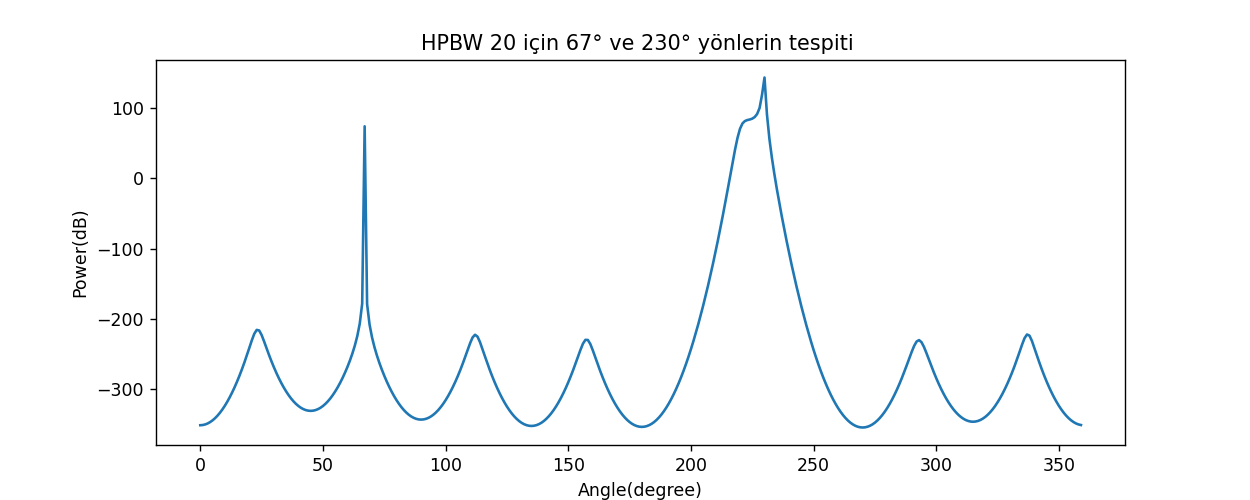

(143.29940428882244+0j)
Max peak indeksi: (array([230], dtype=int64),)


In [4]:
halfPowerBeamwidth = 20*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 20 için 67° ve 230° yönlerin tespiti ")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

[[-4.49639184e-05+1.36067485e-03j -3.52458151e-20-1.93992696e-20j]
 [-2.31309976e+02-1.81085701e+02j -1.23404186e-38+1.71649090e-38j]
 [-2.05742133e+02-1.52160936e+02j -1.02002229e-23+2.83694258e-26j]
 [ 2.98287817e-05+8.99403809e-04j  1.15978203e-09-4.33564834e-10j]
 [-4.21947742e-16-1.27687644e-14j -5.31559494e-01+2.92569938e-01j]
 [-5.76552710e-31+4.51365970e-31j -7.00687019e+02-9.74620823e+02j]
 [-1.54678161e-30+1.14395498e-30j -9.58661009e+00-2.66628117e-02j]
 [ 8.44289017e-16-2.54571831e-14j  2.89522229e-07+1.08232973e-07j]]
a_phi dimensions: (8, 2)
[[-8.99278368e-04+2.72134970e-02j -8.55177120e-04+2.58789279e-02j
  -7.27198888e-04+2.20061168e-02j ... -7.27198888e-04+2.20061168e-02j
  -8.55177120e-04+2.58789279e-02j -8.99278368e-04+2.72134970e-02j]
 [-4.62619952e+03-3.62171402e+03j -4.39932742e+03-3.44410260e+03j
  -3.74096305e+03-2.92868872e+03j ... -3.74096305e+03-2.92868872e+03j
  -4.39932742e+03-3.44410260e+03j -4.62619952e+03-3.62171402e+03j]
 [-4.11484266e+03-3.04321872e+03

<IPython.core.display.Javascript object>


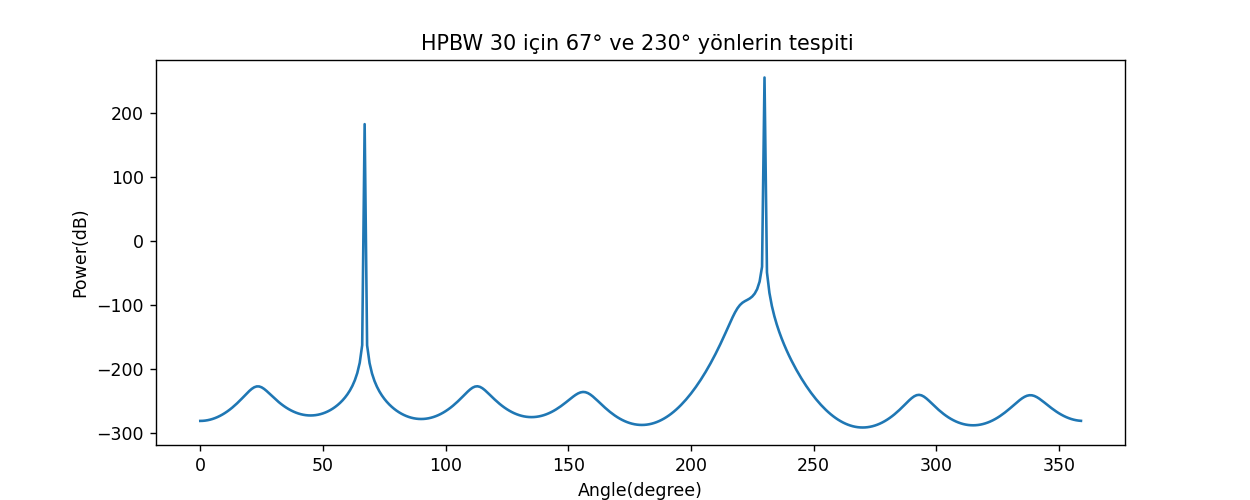

(256.2501773046195+0j)
Max peak indeksi: (array([230], dtype=int64),)


In [5]:
halfPowerBeamwidth = 30*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 30 için 67° ve 230° yönlerin tespiti ")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

[[-5.87154882e-03+1.77681775e-01j -7.84545394e-11-4.31813183e-11j]
 [-1.40105691e+02-1.09684579e+02j -2.72961791e-21+3.79676286e-21j]
 [-1.32374758e+02-9.79005461e+01j -8.49868910e-13+2.36370255e-15j]
 [ 4.66858886e-03+1.40768290e-01j  6.65724066e-05-2.48869647e-05j]
 [-3.67895598e-09-1.11330664e-07j -4.81385503e+00+2.64954212e+00j]
 [-6.41310566e-17+5.02062970e-17j -2.29264117e+02-3.18894993e+02j]
 [-1.12749512e-16+8.33862812e-17j -2.59534804e+01-7.21832592e-02j]
 [ 5.44320158e-09-1.64124579e-07j  1.48517840e-03+5.55208746e-04j]]
a_phi dimensions: (8, 2)
[[-1.17430978e-01+3.55363549e+00j -1.11672079e-01+3.37936269e+00j
  -9.49602247e-02+2.87363721e+00j ... -9.49602247e-02+2.87363721e+00j
  -1.11672079e-01+3.37936269e+00j -1.17430978e-01+3.55363549e+00j]
 [-2.80211382e+03-2.19369158e+03j -2.66469618e+03-2.08611139e+03j
  -2.26592135e+03-1.77392244e+03j ... -2.26592135e+03-1.77392244e+03j
  -2.66469618e+03-2.08611139e+03j -2.80211382e+03-2.19369158e+03j]
 [-2.64749517e+03-1.95801092e+03

<IPython.core.display.Javascript object>


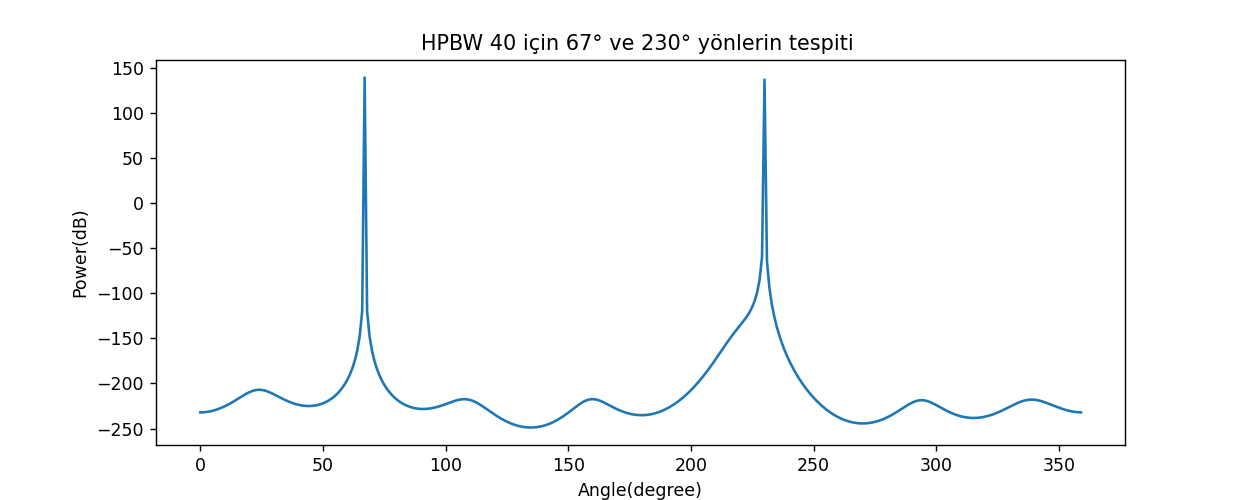

(139.13333086188402+0j)
Max peak indeksi: (array([67], dtype=int64),)


In [6]:
halfPowerBeamwidth = 40*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 40 için 67° ve 230° yönlerin tespiti ")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

[[-3.90644657e-02+1.18214866e+00j -1.16106139e-06-6.39047298e-07j]
 [-7.75084428e+01-6.06790548e+01j -2.03202268e-13+2.82644257e-13j]
 [-7.53069007e+01-5.56948076e+01j -6.72621285e-08+1.87073163e-10j]
 [ 3.37772213e-02+1.01845800e+00j  7.40744586e-03-2.76914796e-03j]
 [-4.18643077e-06-1.26687604e-04j -9.31311871e+00+5.12593339e+00j]
 [-1.41951860e-10+1.11129890e-10j -9.53758576e+01-1.32663078e+02j]
 [-2.05226221e-10+1.51779383e-10j -2.87124697e+01-7.98567135e-02j]
 [ 5.38631743e-06-1.62409396e-04j  5.40379021e-02+2.02011529e-02j]]
a_phi dimensions: (8, 2)
[[-7.81312535e-01+2.36429605e+01j -7.42993110e-01+2.24834948e+01j
  -6.31794524e-01+1.91188190e+01j ... -6.31794524e-01+1.91188190e+01j
  -7.42993110e-01+2.24834948e+01j -7.81312535e-01+2.36429605e+01j]
 [-1.55016886e+03-1.21358110e+03j -1.47414748e+03-1.15406622e+03j
  -1.25353962e+03-9.81358892e+02j ... -1.25353962e+03-9.81358892e+02j
  -1.47414748e+03-1.15406622e+03j -1.55016886e+03-1.21358110e+03j]
 [-1.50613802e+03-1.11389615e+03

<IPython.core.display.Javascript object>


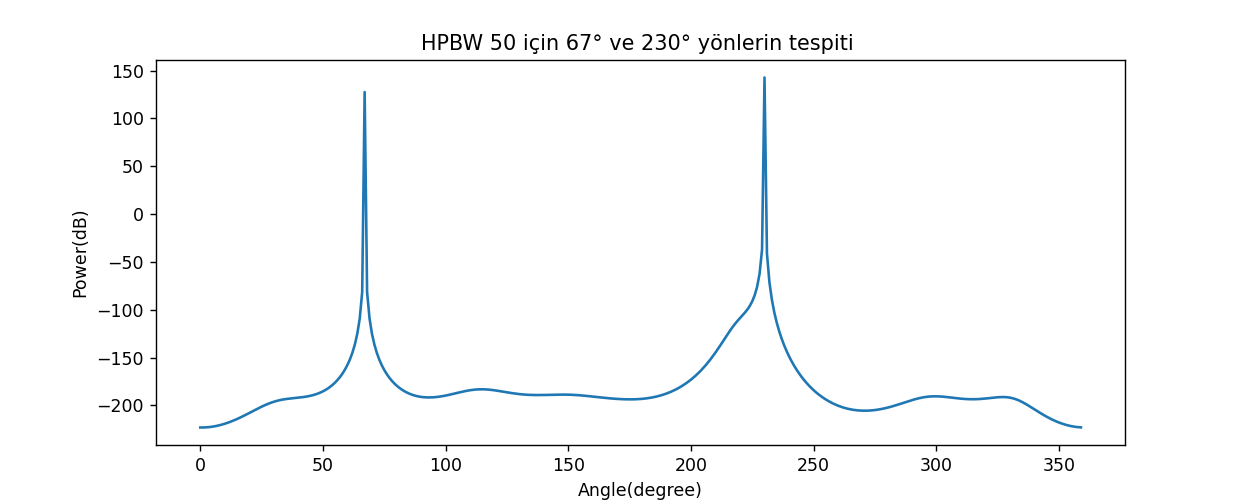

(142.77207294737235+0j)
Max peak indeksi: (array([230], dtype=int64),)


In [7]:
halfPowerBeamwidth = 50*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 50 için 67° ve 230° yönlerin tespiti ")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
#print(azimuthAngles/radyan)
print(f'Max peak indeksi: {indx}')

[[-8.56454717e-02+2.59175898e+00j -1.67499721e-04-9.21917178e-05j]
 [-4.40079358e+01-3.44525041e+01j -3.00488238e-09+4.17964206e-09j]
 [-4.34119557e+01-3.21062280e+01j -2.41259778e-05+6.71005078e-08j]
 [ 7.75040162e-02+2.33691768e+00j  7.50108521e-02-2.80415344e-02j]
 [-1.49900484e-04-4.53621094e-03j -1.04381893e+01+5.74517137e+00j]
 [-3.10951146e-07+2.43434405e-07j -4.63848356e+01-6.45190013e+01j]
 [-4.04236748e-07+2.98961818e-07j -2.37546576e+01-6.60677713e-02j]
 [ 1.78767313e-04-5.39023029e-03j  2.98160758e-01+1.11462341e-01j]]
a_phi dimensions: (8, 2)
[[  -1.71625943+5.18333359e+01j   -1.63161611+4.92916547e+01j
    -1.38617053+4.19158027e+01j ...   -1.38617053+4.19158027e+01j
    -1.63161611+4.92916547e+01j   -1.71625943+5.18333359e+01j]
 [-880.15871511-6.89050082e+02j -836.99510815-6.55258578e+02j
  -711.73783502-5.57198384e+02j ... -711.73783502-5.57198384e+02j
  -836.99510815-6.55258578e+02j -880.15871511-6.89050082e+02j]
 [-868.23959638-6.42124558e+02j -825.66044279-6.10634315

<IPython.core.display.Javascript object>


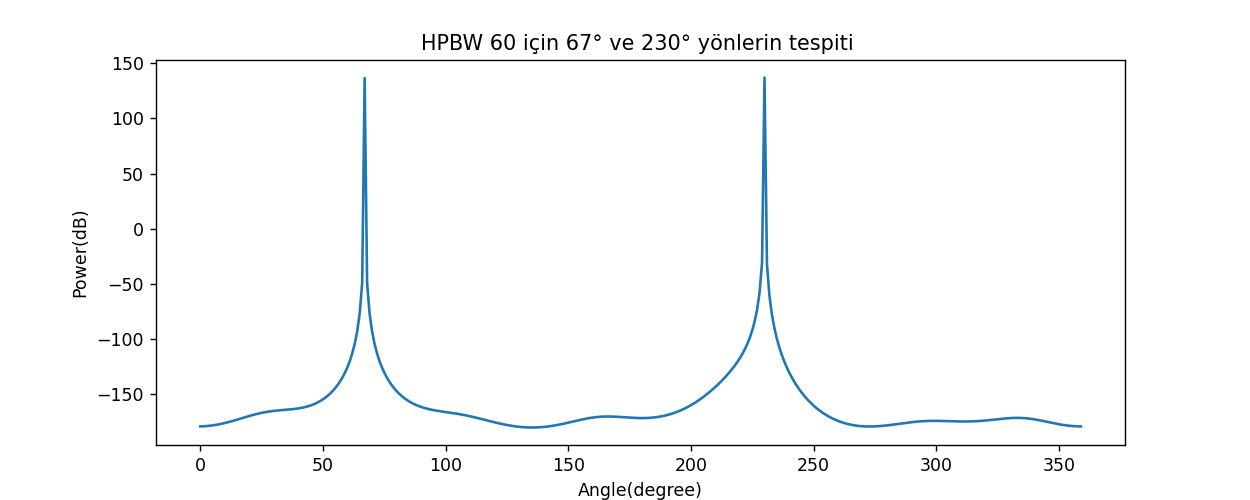

(137.0204274930206+0j)
Max peak indeksi: (array([230], dtype=int64),)


In [8]:
halfPowerBeamwidth = 60*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 60 için 67° ve 230° yönlerin tespiti ")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

[[-7.65529842e-12+2.31660683e-10j -1.30745999e-47-7.19624977e-48j]
 [-1.83146393e+02-1.43379865e+02j -6.47637982e-89+9.00832250e-89j]
 [-1.37091790e+02-1.01389126e+02j -1.21054970e-55+3.36684798e-58j]
 [ 3.02681652e-12+9.12652194e-11j  5.54577054e-24-2.07319223e-24j]
 [-1.17991245e-36-3.57059006e-35j -1.85322492e-04+1.02001357e-04j]
 [-8.03986661e-72+6.29417247e-72j -3.22306616e+03-4.48312486e+03j]
 [-7.21521726e-71+5.33616619e-71j -1.05282764e-01-2.92818263e-04j]
 [ 5.59321159e-36-1.68647713e-34j  1.37372361e-18+5.13543264e-19j]]
a_phi dimensions: (8, 2)
[[-1.53105968e-10+4.63321366e-09j -1.45597543e-10+4.40599758e-09j
  -1.23808705e-10+3.74663501e-09j ... -1.23808705e-10+3.74663501e-09j
  -1.45597543e-10+4.40599758e-09j -1.53105968e-10+4.63321366e-09j]
 [-3.66292787e+03-2.86759729e+03j -3.48329529e+03-2.72696829e+03j
  -2.96201618e+03-2.31887437e+03j ... -2.96201618e+03-2.31887437e+03j
  -3.48329529e+03-2.72696829e+03j -3.66292787e+03-2.86759729e+03j]
 [-2.74183580e+03-2.02778253e+03

<IPython.core.display.Javascript object>


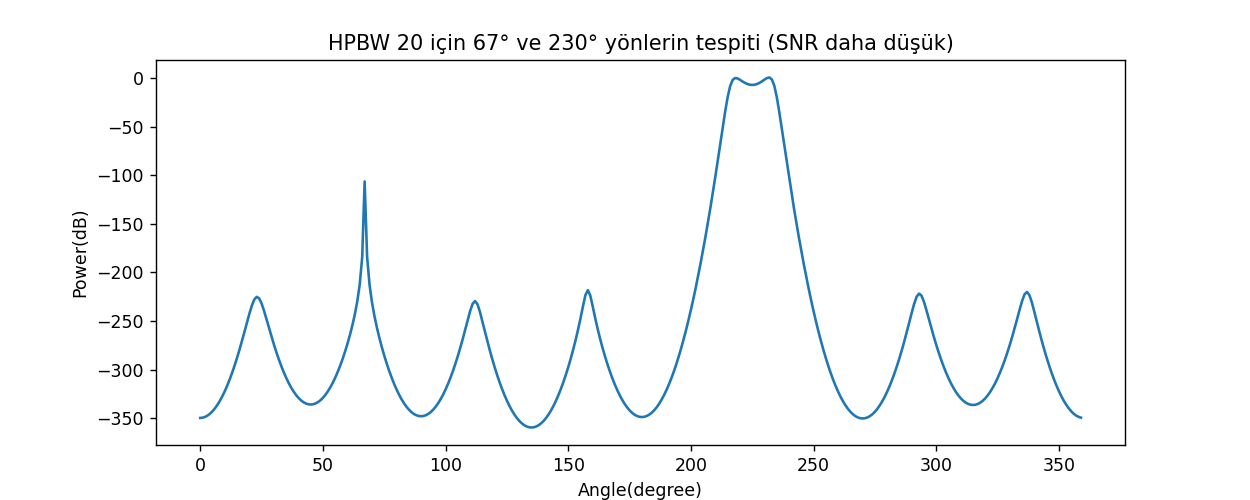

(0.5640604078538869+0j)
Max peak indeksi: (array([232], dtype=int64),)


In [12]:
halfPowerBeamwidth = 20*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 20 için 67° ve 230° yönlerin tespiti (SNR daha düşük)")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

[[-4.49639184e-05+1.36067485e-03j -3.52458151e-20-1.93992696e-20j]
 [-2.31309976e+02-1.81085701e+02j -1.23404186e-38+1.71649090e-38j]
 [-2.05742133e+02-1.52160936e+02j -1.02002229e-23+2.83694258e-26j]
 [ 2.98287817e-05+8.99403809e-04j  1.15978203e-09-4.33564834e-10j]
 [-4.21947742e-16-1.27687644e-14j -5.31559494e-01+2.92569938e-01j]
 [-5.76552710e-31+4.51365970e-31j -7.00687019e+02-9.74620823e+02j]
 [-1.54678161e-30+1.14395498e-30j -9.58661009e+00-2.66628117e-02j]
 [ 8.44289017e-16-2.54571831e-14j  2.89522229e-07+1.08232973e-07j]]
a_phi dimensions: (8, 2)
[[-8.99278368e-04+2.72134970e-02j -8.55177120e-04+2.58789279e-02j
  -7.27198888e-04+2.20061168e-02j ... -7.27198888e-04+2.20061168e-02j
  -8.55177120e-04+2.58789279e-02j -8.99278368e-04+2.72134970e-02j]
 [-4.62619952e+03-3.62171402e+03j -4.39932742e+03-3.44410260e+03j
  -3.74096305e+03-2.92868872e+03j ... -3.74096305e+03-2.92868872e+03j
  -4.39932742e+03-3.44410260e+03j -4.62619952e+03-3.62171402e+03j]
 [-4.11484266e+03-3.04321872e+03

<IPython.core.display.Javascript object>


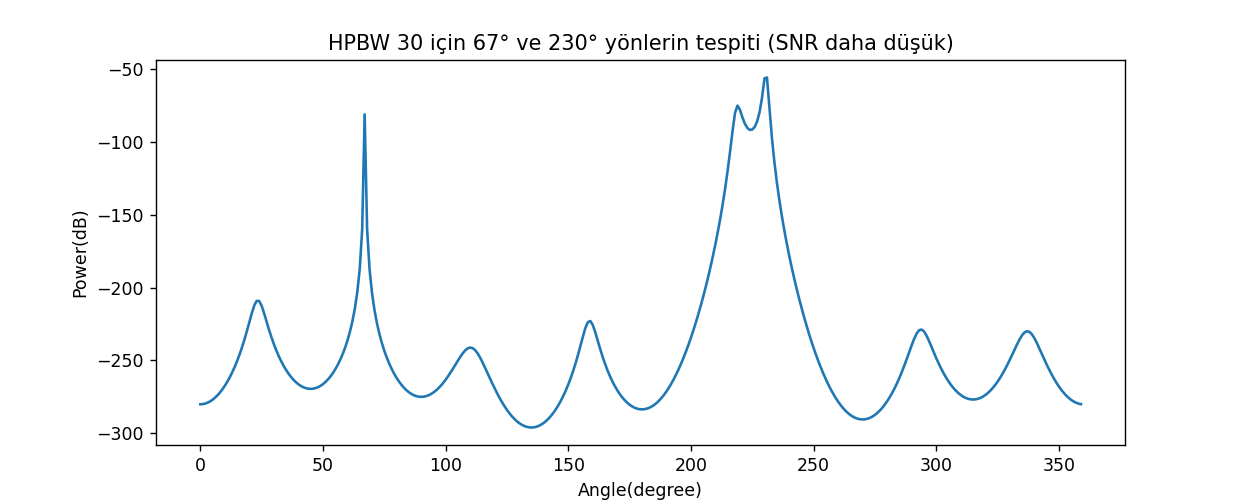

(-55.79188207510165+0j)
Max peak indeksi: (array([231], dtype=int64),)


In [13]:
halfPowerBeamwidth = 30*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 30 için 67° ve 230° yönlerin tespiti (SNR daha düşük)")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

[[-5.87154882e-03+1.77681775e-01j -7.84545394e-11-4.31813183e-11j]
 [-1.40105691e+02-1.09684579e+02j -2.72961791e-21+3.79676286e-21j]
 [-1.32374758e+02-9.79005461e+01j -8.49868910e-13+2.36370255e-15j]
 [ 4.66858886e-03+1.40768290e-01j  6.65724066e-05-2.48869647e-05j]
 [-3.67895598e-09-1.11330664e-07j -4.81385503e+00+2.64954212e+00j]
 [-6.41310566e-17+5.02062970e-17j -2.29264117e+02-3.18894993e+02j]
 [-1.12749512e-16+8.33862812e-17j -2.59534804e+01-7.21832592e-02j]
 [ 5.44320158e-09-1.64124579e-07j  1.48517840e-03+5.55208746e-04j]]
a_phi dimensions: (8, 2)
[[-1.17430978e-01+3.55363549e+00j -1.11672079e-01+3.37936269e+00j
  -9.49602247e-02+2.87363721e+00j ... -9.49602247e-02+2.87363721e+00j
  -1.11672079e-01+3.37936269e+00j -1.17430978e-01+3.55363549e+00j]
 [-2.80211382e+03-2.19369158e+03j -2.66469618e+03-2.08611139e+03j
  -2.26592135e+03-1.77392244e+03j ... -2.26592135e+03-1.77392244e+03j
  -2.66469618e+03-2.08611139e+03j -2.80211382e+03-2.19369158e+03j]
 [-2.64749517e+03-1.95801092e+03

<IPython.core.display.Javascript object>


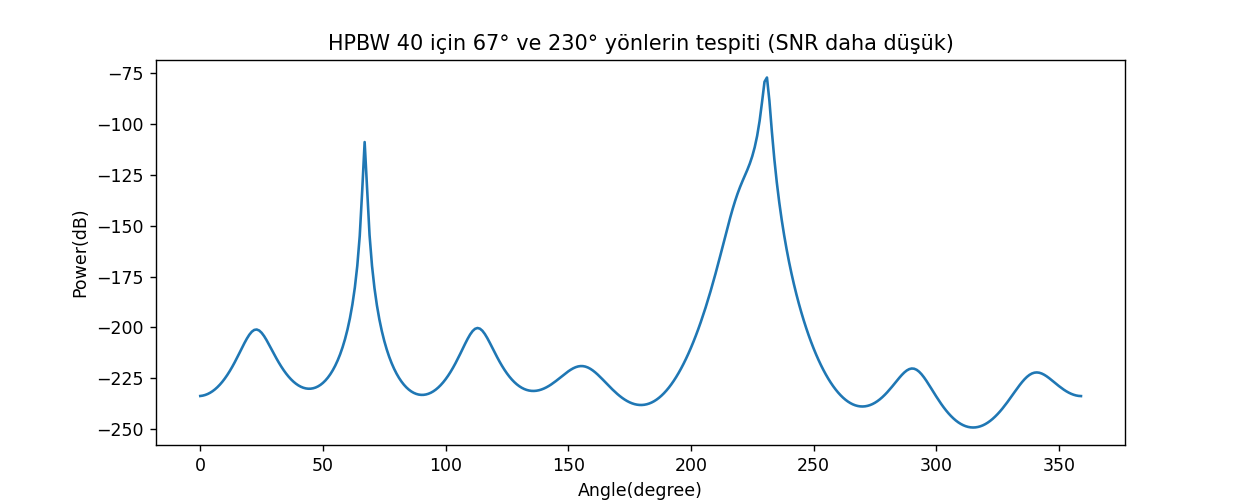

(-77.01193277593589+0j)
Max peak indeksi: (array([231], dtype=int64),)


In [14]:
halfPowerBeamwidth = 40*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 40 için 67° ve 230° yönlerin tespiti (SNR daha düşük)")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

[[-3.90644657e-02+1.18214866e+00j -1.16106139e-06-6.39047298e-07j]
 [-7.75084428e+01-6.06790548e+01j -2.03202268e-13+2.82644257e-13j]
 [-7.53069007e+01-5.56948076e+01j -6.72621285e-08+1.87073163e-10j]
 [ 3.37772213e-02+1.01845800e+00j  7.40744586e-03-2.76914796e-03j]
 [-4.18643077e-06-1.26687604e-04j -9.31311871e+00+5.12593339e+00j]
 [-1.41951860e-10+1.11129890e-10j -9.53758576e+01-1.32663078e+02j]
 [-2.05226221e-10+1.51779383e-10j -2.87124697e+01-7.98567135e-02j]
 [ 5.38631743e-06-1.62409396e-04j  5.40379021e-02+2.02011529e-02j]]
a_phi dimensions: (8, 2)
[[-7.81312535e-01+2.36429605e+01j -7.42993110e-01+2.24834948e+01j
  -6.31794524e-01+1.91188190e+01j ... -6.31794524e-01+1.91188190e+01j
  -7.42993110e-01+2.24834948e+01j -7.81312535e-01+2.36429605e+01j]
 [-1.55016886e+03-1.21358110e+03j -1.47414748e+03-1.15406622e+03j
  -1.25353962e+03-9.81358892e+02j ... -1.25353962e+03-9.81358892e+02j
  -1.47414748e+03-1.15406622e+03j -1.55016886e+03-1.21358110e+03j]
 [-1.50613802e+03-1.11389615e+03

<IPython.core.display.Javascript object>


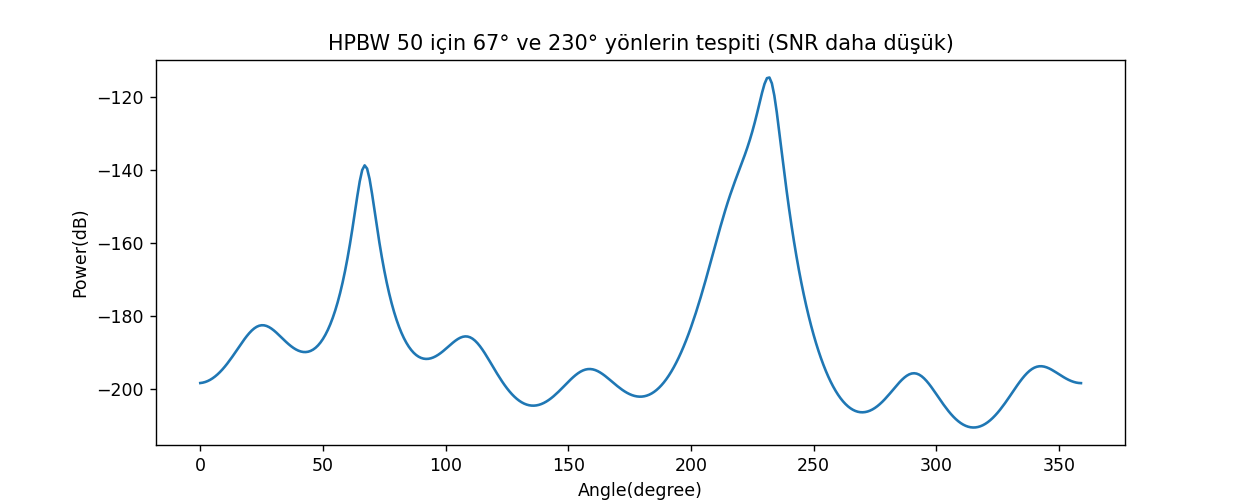

(-114.66869549040067+0j)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 1

In [15]:
halfPowerBeamwidth = 50*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 50 için 67° ve 230° yönlerin tespiti (SNR daha düşük)")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(azimuthAngles/radyan)
print(f'Max peak indeksi: {indx}')

[[-8.56454717e-02+2.59175898e+00j -1.67499721e-04-9.21917178e-05j]
 [-4.40079358e+01-3.44525041e+01j -3.00488238e-09+4.17964206e-09j]
 [-4.34119557e+01-3.21062280e+01j -2.41259778e-05+6.71005078e-08j]
 [ 7.75040162e-02+2.33691768e+00j  7.50108521e-02-2.80415344e-02j]
 [-1.49900484e-04-4.53621094e-03j -1.04381893e+01+5.74517137e+00j]
 [-3.10951146e-07+2.43434405e-07j -4.63848356e+01-6.45190013e+01j]
 [-4.04236748e-07+2.98961818e-07j -2.37546576e+01-6.60677713e-02j]
 [ 1.78767313e-04-5.39023029e-03j  2.98160758e-01+1.11462341e-01j]]
a_phi dimensions: (8, 2)
[[  -1.71625943+5.18333359e+01j   -1.63161611+4.92916547e+01j
    -1.38617053+4.19158027e+01j ...   -1.38617053+4.19158027e+01j
    -1.63161611+4.92916547e+01j   -1.71625943+5.18333359e+01j]
 [-880.15871511-6.89050082e+02j -836.99510815-6.55258578e+02j
  -711.73783502-5.57198384e+02j ... -711.73783502-5.57198384e+02j
  -836.99510815-6.55258578e+02j -880.15871511-6.89050082e+02j]
 [-868.23959638-6.42124558e+02j -825.66044279-6.10634315

<IPython.core.display.Javascript object>


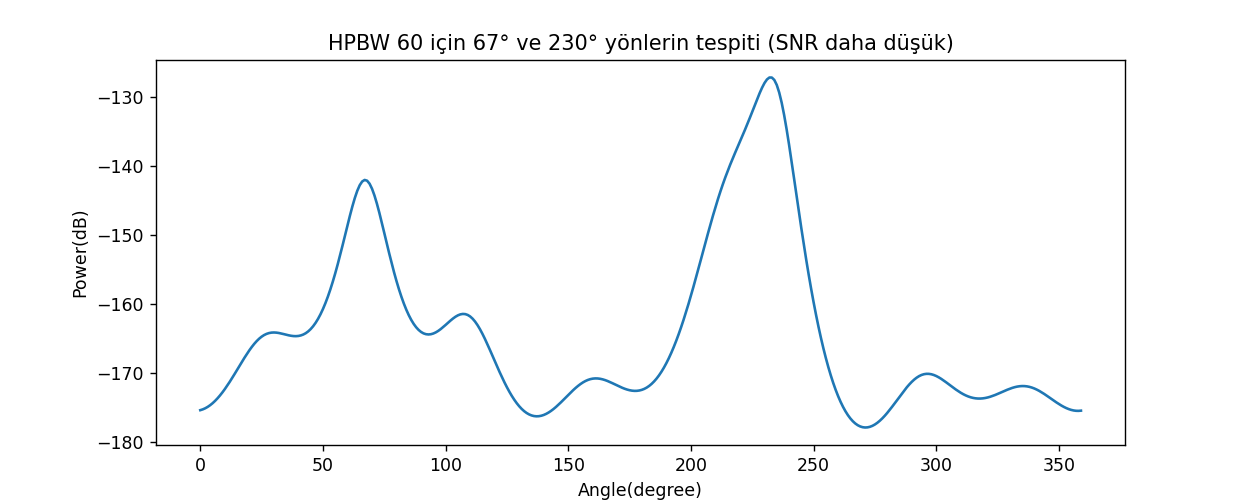

(-127.11152788972396+0j)
Max peak indeksi: (array([232], dtype=int64),)


In [16]:
halfPowerBeamwidth = 60*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 60 için 67° ve 230° yönlerin tespiti (SNR daha düşük)")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

[[ 8.68432794e-08-7.50638210e-08j]
 [-5.41455791e-01+5.43454006e-01j]
 [-3.46803301e+02-4.37688686e+02j]
 [-4.32010401e+01-9.69559001e+00j]
 [ 2.89272814e-04+2.50035730e-04j]
 [-2.53841767e-13-2.54778557e-13j]
 [-2.28829481e-26+2.88797928e-26j]
 [-4.01191414e-43+9.00392086e-44j]]
a_phi dimensions: (8, 1)
[[ 1.73686559e-06-1.50127642e-06j  1.65168847e-06-1.42765276e-06j
   1.40451141e-06-1.21400290e-06j ...  1.40451141e-06-1.21400290e-06j
   1.65168847e-06-1.42765276e-06j  1.73686559e-06-1.50127642e-06j]
 [-1.08291158e+01+1.08690801e+01j -1.02980483e+01+1.03360527e+01j
  -8.75693363e+00+8.78925065e+00j ... -8.75693363e+00+8.78925065e+00j
  -1.02980483e+01+1.03360527e+01j -1.08291158e+01+1.08690801e+01j]
 [-6.93606602e+03-8.75377372e+03j -6.59591643e+03-8.32448245e+03j
  -5.60883001e+03-7.07871415e+03j ... -5.60883001e+03-7.07871415e+03j
  -6.59591643e+03-8.32448245e+03j -6.93606602e+03-8.75377372e+03j]
 ...
 [-5.07683534e-12-5.09557115e-12j -4.82786374e-12-4.84568073e-12j
  -4.10536842e

<IPython.core.display.Javascript object>


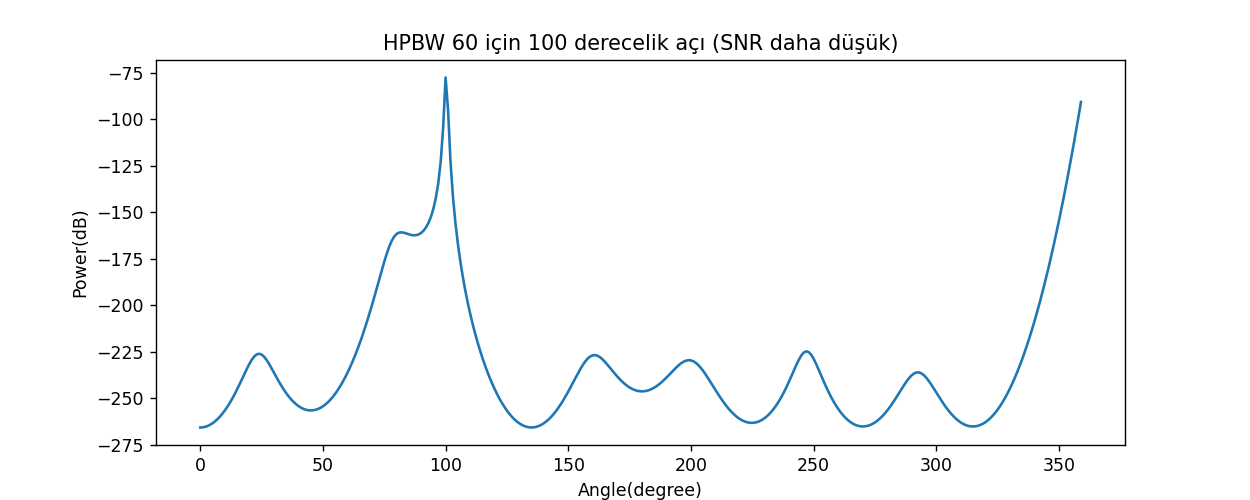

(-77.47600184002846+0j)
Max peak indeksi: (array([100], dtype=int64),)


In [3]:
halfPowerBeamwidth = 35*(pi/180)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

        
rec_sig,x_k = create_signal_UCA(M,D,lamda,delta,phi,signal,t,antennaGains,noise_db)
Pmusic = music_UCA(rec_sig,(azimuthAngles/radyan),M,D,lamda,delta,antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles/radyan,Pmusic)
plt.xlabel("Angle(degree)")
plt.ylabel("Power(dB)")
plt.title("HPBW 60 için 100 derecelik açı (SNR daha düşük)")
maksi = max(Pmusic)
print(maksi)
indx = np.where(Pmusic == maksi)
print(f'Max peak indeksi: {indx}')

In [22]:
a_phi = np.array([[0 for i in range(len(azimuthAngles))] for j in range(M)],dtype=np.complex_)
angle = np.arange(-180,180,1)
for item in range(len(angle)):#sinyal sayısı
    for n in range(M):#anten sayısı
        #a_phi[n][item] = np.exp(1j*beta*r*np.cos(phi-2*n*pi/M))
        a_phi[n][item] = beta[n][item]*np.exp(1j*2*pi*(r/lamda)*np.cos(np.deg2rad(angle[item])-((n/M)*2*np.pi))) #exp in içine bak
        
print(F'a_phi[1]:\n{a_phi[1]}\n\na_phi[3]:\n{a_phi[3]}')

a_phi[1]:
[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+0

In [40]:
for item in range(len(angles)):#sinyal sayısı
        for n in range(M):#anten sayısı
            print(antennaGains[n][item])

6561.0
3.501478340160581e-21
5.32225481403844e-94
2.30410727726991e-215
6515.884925999218
1.2040611916512919e-20
6.337041111102065e-93
9.49920594209683e-214
6382.392521068078
4.08368664230532e-20
7.441905002528653e-92
3.862590313484631e-212
6165.954993906141
1.366038678951201e-19
8.619626651123527e-91
1.549090273176351e-210
5875.217204718582
4.506924880308299e-19
9.84689994064427e-90
6.12747493048966e-209
5521.463932894044
1.4665753416163959e-18
1.109474514445755e-88
2.390523929092562e-207
5117.894020752763
4.706902193409775e-18
1.23293980103954e-87
9.198380777492063e-206
4678.806379867831
1.48995346845314e-17
1.3513665055564433e-86
3.490891962229877e-204
4218.767527778445
4.651756500164732e-17
1.460868634349845e-85
1.3066767659426963e-202
3751.827409038486
1.4324120867961356e-16
1.5575999155295789e-84
4.8239929652777616e-201
3290.8405891423904
4.350365207177983e-16
1.6379754996668576e-83
1.7565151453746262e-199
2846.9351519628485
1.3031373514037717e-15
1.698891424060963e-82
6.30817696

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook 
pi = np.pi
centerFrequency = f
lamda = 3*10**8/f
azimuthReferenceAngle = 45*(pi/180)
halfPowerBeamwidth = 40*(pi/180)
azimuthAngles = np.arange(0,360,1)*(pi/180)

antennaGains = np.zeros(len(azimuthAngles))

for aID in range(len(azimuthAngles)):
    antennaGains[aID] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[aID],azimuthReferenceAngle)
print(antennaGains)
plt.figure(figsize=(10,4))
plt.plot(azimuthAngles*(180/pi),antennaGains)

In [5]:
print(azimuthReferenceAngle)

[0.         0.02193245 0.04386491 0.06579736 0.08772982]


In [9]:
xx = 72*np.pi/180

In [10]:
xx/radyan

72.0

In [12]:
azimuthReferenceAngle = np.array([(item*2*np.pi/M) for item in range(M)])
print(azimuthReferenceAngle)

[0.         1.25663706 2.51327412 3.76991118 5.02654825]


In [8]:
azimuthAngles/radyan

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 3.597e+02, 3.598e+02,
       3.599e+02])

array([500.])

In [17]:
import numpy as np

def add_awgn(signal, snr_db):
    signal_power = np.sum(np.abs(signal)**2) / len(signal)
    noise_power = signal_power / (10**(snr_db / 10.0))
    noise = np.random.normal(0, np.sqrt(noise_power), signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

# Örnek sinyal oluşturma
signal_length = 1000
original_signal = np.random.randn(signal_length)

# SNR değeri belirleme
desired_snr_db = 10

# AWGN ekleyerek noisy sinyal elde etme
noisy_signal = add_awgn(original_signal, desired_snr_db)

# SNR hesaplama
noisy_signal_power = np.sum(np.abs(noisy_signal)**2) / len(noisy_signal)
noise_power = noisy_signal_power - np.sum(np.abs(original_signal)**2) / len(original_signal)
calculated_snr_db = 10 * np.log10(np.sum(np.abs(original_signal)**2) / noise_power)

print("Desired SNR:", desired_snr_db)
print("Calculated SNR:", calculated_snr_db)


Desired SNR: 10
Calculated SNR: 39.11338008351582


In [21]:
def return_power_of_signal(input_signal):
    #The power of a signal is the sum of the absolute squares of its time-domain samples divided 
    #by the signal length, or, equivalently, the square of its RMS level.
    #my approach
    
    #input: np.array of (n_sample, time_length)
    
    n_sample = input_signal.shape[0]
    n_time = input_signal.shape[1]
    
    results_array = np.empty((n_sample, 1))
    
    for i in range(n_sample):
        sum_sample = 0
        for j in range(n_time):
            sum_sample += input_signal[i, j]*input_signal[i, j]
        sum_sample = sum_sample/n_time
        results_array[i] = sum_sample
    
    return results_array
nse = np.random.randn()
arr = return_power_of_signal(noise)
arr

NameError: name 'noise' is not defined

<IPython.core.display.Javascript object>


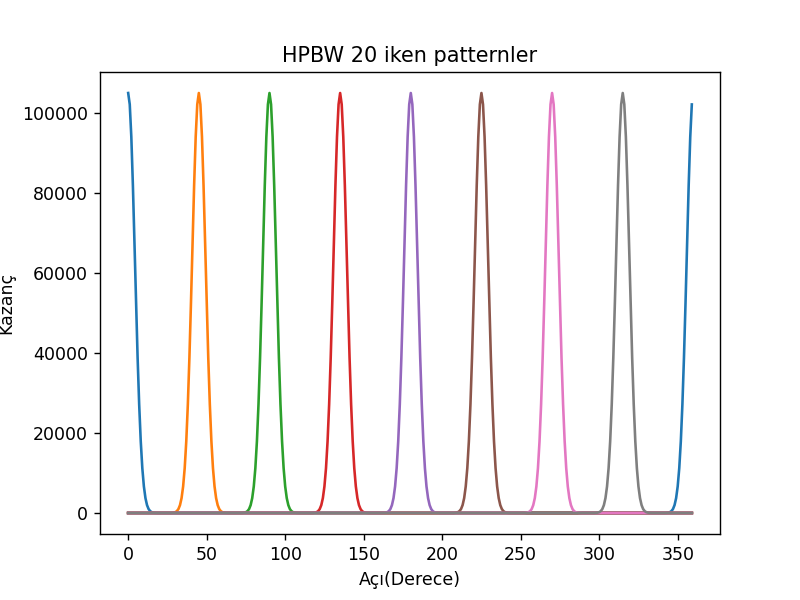

104976.0
102118.28033708931


In [17]:
plt.figure()
plt.plot(azimuthAngles*180/np.pi,antennaGains[0])
plt.plot(azimuthAngles*180/np.pi,antennaGains[1])
plt.plot(azimuthAngles*180/np.pi,antennaGains[2])
plt.plot(azimuthAngles*180/np.pi,antennaGains[3])
plt.plot(azimuthAngles*180/np.pi,antennaGains[4])
plt.plot(azimuthAngles*180/np.pi,antennaGains[5])
plt.plot(azimuthAngles*180/np.pi,antennaGains[6])
plt.plot(azimuthAngles*180/np.pi,antennaGains[7])
plt.xlabel("Açı(Derece)")
plt.ylabel("Kazanç")
plt.title("HPBW 20 iken patternler")
print(antennaGains[0][0])
print(antennaGains[0][359])

In [1]:
import numpy as np
import math



def FNC_GaussianAntennaPattern(lamda,HPBW,azimuth_angle,azimuth_reference_angle):
    apertureEfficiency = 0.9
    elevationAngle = 90*(pi/180)
    elevationReferenceAngle = 90*(pi/180)
    dishDiameter = lamda/(HPBW*math.sqrt(apertureEfficiency))
    if azimuth_reference_angle == 0 and azimuth_angle > (180*np.pi/180):
        azimuth_angle = (360*np.pi/180-azimuth_angle)
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
    elif azimuth_reference_angle == (45*np.pi/180) and azimuth_angle > (225*np.pi/180):
        azimuth_angle = (360*np.pi/180-azimuth_angle)+90*np.pi/180
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
        
    elif azimuth_reference_angle == (90*np.pi/180) and azimuth_angle > (270*np.pi/180):
        azimuth_angle = (360*np.pi/180-azimuth_angle)+180*np.pi/180
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
    
    elif azimuth_reference_angle == (135*np.pi/180) and azimuth_angle > (315*np.pi/180):
        azimuth_angle = (360*np.pi/180-azimuth_angle)+270*np.pi/180
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
        
        ## 180 derecede zaten tam bir gauss yaşandığından onu kalibre etmeme gerek yok.
    
    elif azimuth_reference_angle == (225*np.pi/180) and azimuth_angle < ((azimuth_reference_angle-180*np.pi/180)):
        azimuth_angle = (90*np.pi/180-azimuth_angle)
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
        
    elif azimuth_reference_angle == (270*np.pi/180) and azimuth_angle < ((azimuth_reference_angle-180*np.pi/180)):
        azimuth_angle = (180*np.pi/180-azimuth_angle)
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
    
    elif azimuth_reference_angle == (315*np.pi/180) and azimuth_angle < ((azimuth_reference_angle-180*np.pi/180)):
        azimuth_angle = (270*np.pi/180-azimuth_angle)
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
    
    else:
        azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
        elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
        antennaGain = azimuthAntennaGain*elevationAntennaGain
        
    return antennaGain 

In [5]:
for i in range(len(azimuthAngles)):
        antennaGains[0][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[0])

In [17]:
## ORİJİNAL GUASSIAN FONKSİYONU
def FNC_GaussianAntennaPattern(lamda,HPBW,azimuth_angle,azimuth_reference_angle):
    apertureEfficiency = 0.9
    elevationAngle = 90*(pi/180)
    elevationReferenceAngle = 90*(pi/180)
    dishDiameter = lamda/(HPBW*math.sqrt(apertureEfficiency))
    
    azimuthAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((azimuth_angle-azimuth_reference_angle)/HPBW)**2))
    elevationAntennaGain = apertureEfficiency*((np.pi*dishDiameter/lamda)**2)*np.exp(-2.76*(((elevationAngle-elevationReferenceAngle)/HPBW)**2))
    antennaGain = azimuthAntennaGain*elevationAntennaGain
    return antennaGain 

-31

<IPython.core.display.Javascript object>


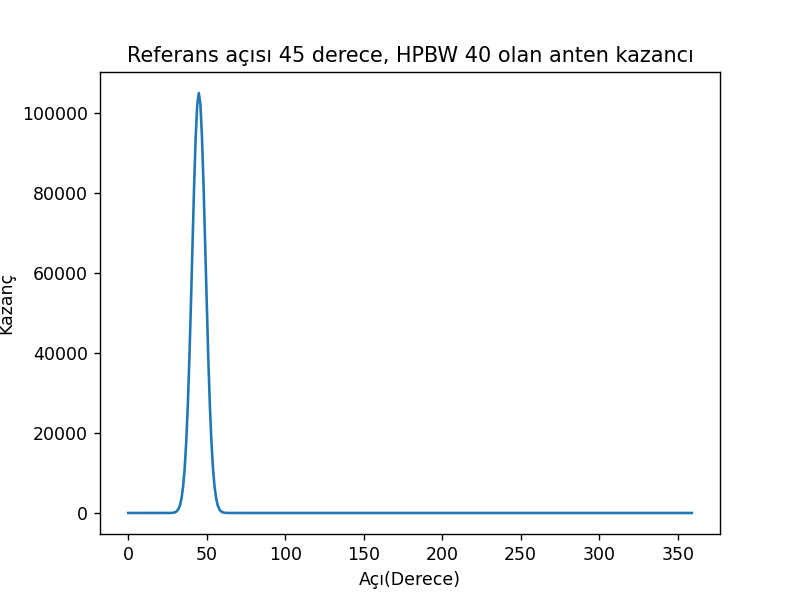

104976.0
102118.28033708931


In [12]:
M=8
pi = np.pi
f = 50 #750 MHz
c = 3*10**8
lamda = c/f
radyan = np.pi/180
azimuthAngles = np.arange(0,360,1)*radyan
antennaGains = np.array([[0 for item in range(len(azimuthAngles))] for element in range(M)],dtype=np.float_) #4x360. 
halfPowerBeamwidth = 10*(pi/180)
azimuthReferenceAngle = np.array([(item*2*np.pi/M) for item in range(M)])
#print(azimuthReferenceAngle/radyan)
for aID in range(M):
    for i in range(len(azimuthAngles)):
        antennaGains[aID][i] = FNC_GaussianAntennaPattern(lamda,halfPowerBeamwidth,azimuthAngles[i],azimuthReferenceAngle[aID])

plt.figure()

plt.plot(azimuthAngles*180/np.pi,antennaGains[1])
plt.xlabel("Açı(Derece)")
plt.ylabel("Kazanç")
plt.title("Referans açısı 45 derece, HPBW 40 olan anten kazancı")
print(antennaGains[0][0])
print(antennaGains[0][359])